In [1]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
scope = pd.read_csv(r"/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/project_1/output/scope.csv")
scope

,coin,date,year,month,open,high,low,close,volume,market_cap,circulating_supply
0,btc,01/01/2018,2018,1,13850.50000,13921.50000,12877.70000,13444.90000,7.842500e+04,2.364403e+11,1.758588e+07
1,btc,02/01/2018,2018,2,13444.90000,15306.10000,12934.20000,14754.10000,1.377320e+05,2.570796e+11,1.742428e+07
2,btc,03/01/2018,2018,3,14754.10000,15435.00000,14579.70000,15156.60000,1.065430e+05,2.615052e+11,1.725355e+07
3,btc,04/01/2018,2018,4,15156.50000,15408.70000,14244.70000,15180.10000,1.109690e+05,2.681247e+11,1.766291e+07
4,btc,05/01/2018,2018,5,15180.10000,17126.90000,14832.40000,16954.80000,1.419600e+05,3.077740e+11,1.815262e+07
...,...,...,...,...,...,...,...,...,...,...,...
21360,atom,29/12/2021,2021,12,26.77838,26.77838,26.77838,26.77838,7.998134e+08,7.658409e+09,2.859922e+08
21361,atom,30/12/2021,2021,12,27.99376,27.99376,27.99376,27.99376,7.885243e+08,7.734245e+09,2.762846e+08
21362,ftm,27/07/2021,2021,7,0.20956,0.20956,0.20956,0.20956,7.798620e+07,5.388942e+08,2.571551e+09
21363,ftm,10/09/2021,2021,10,1.65739,1.65739,1.65739,1.65739,1.817521e+09,4.214438e+09,2.542816e+09


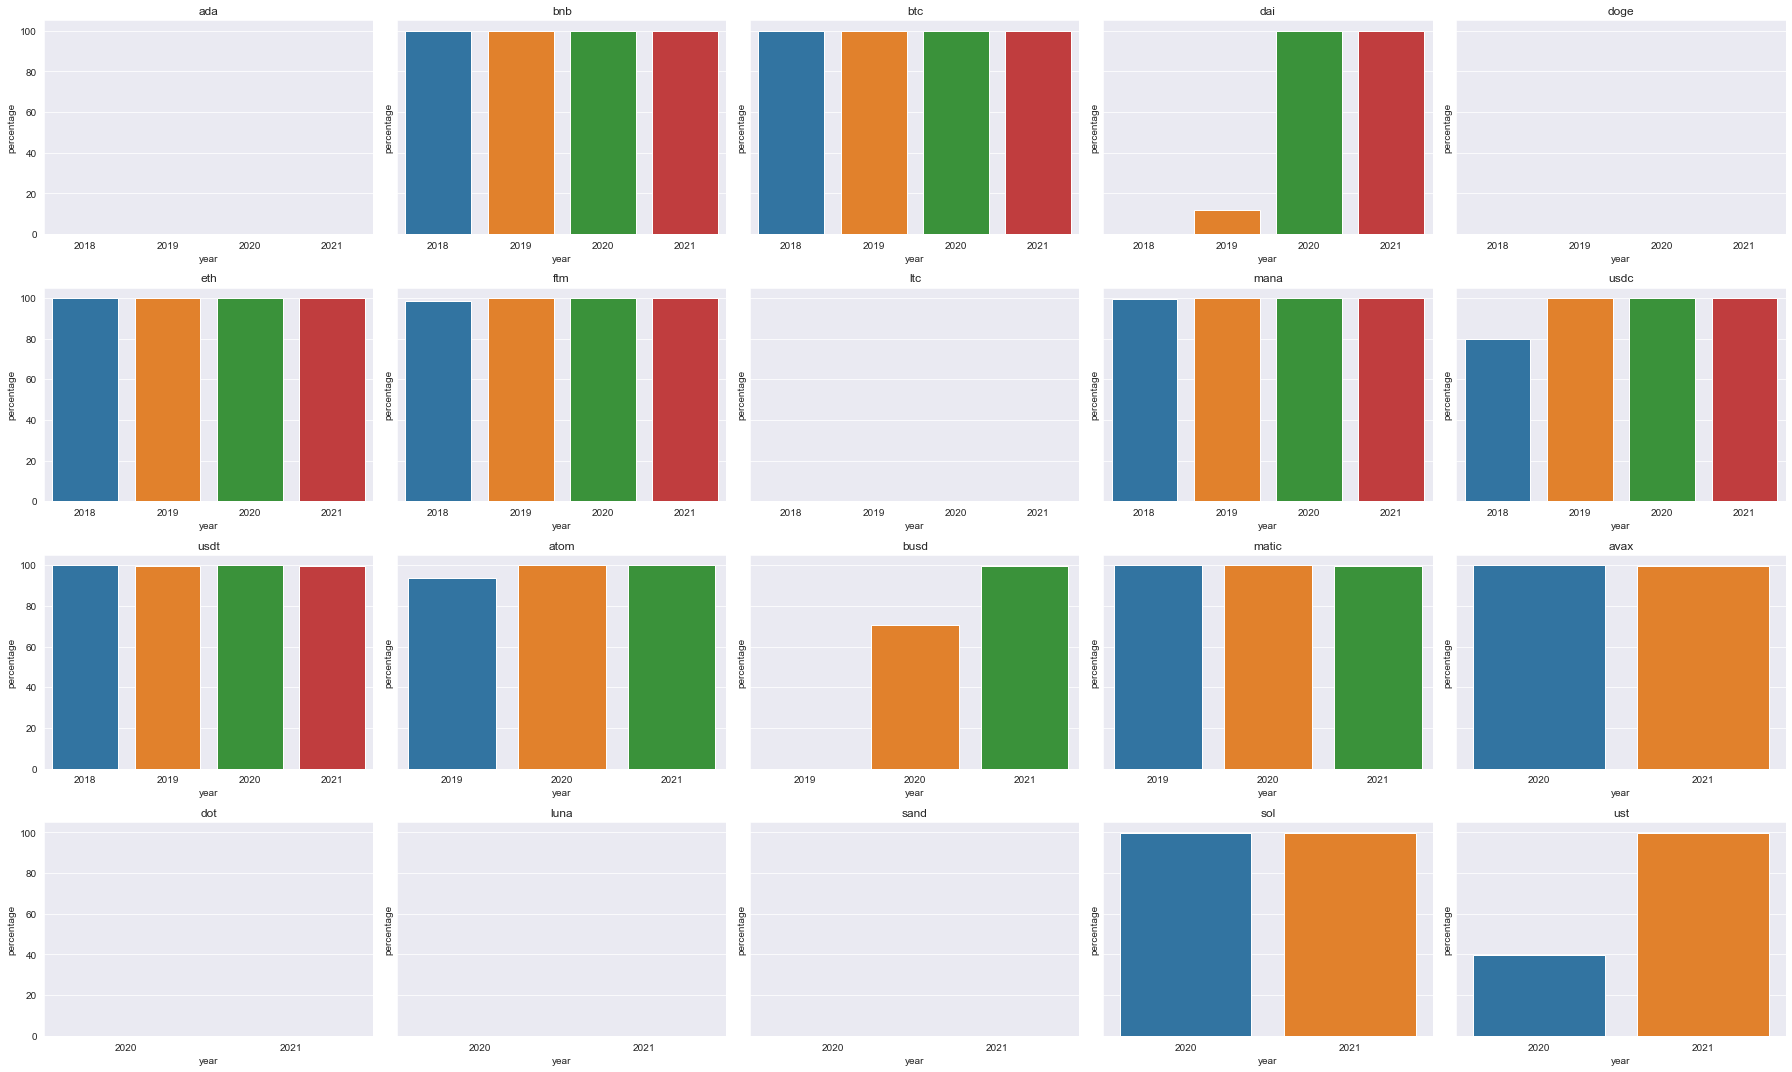

In [3]:
#missing data analysis
missing_data = scope.groupby(["year", "coin"]).count()
missing_data = missing_data[["date", "market_cap"]]
missing_data["percentage"] = missing_data["market_cap"] / missing_data["date"] * 100
missing_data.columns = ["values_per_year", "items_mc_per_year", "percentage"]
missing_data.sort_values(by="coin", ascending=True)

missing_data = missing_data.reset_index()

fig, axes = plt.subplots(4, 5, figsize=(25, 15), sharex=False, sharey=True)

columns = 0
rows = 0

for i in missing_data["coin"].unique():
    sns.barplot(ax=axes[rows,columns], x = 'year', y = 'percentage', data = missing_data.loc[missing_data["coin"] == i])
    axes[rows,columns].set_title(i)
    if columns == 4:
        columns = 0
        rows += 1
    else:
        columns += 1

fig.tight_layout()

#all coins will be kept stored in dict_tickers - missing data must be taken into account prior analysis